<a href="https://colab.research.google.com/github/nidhi76/PPL20/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AUDIO EVENT DETECTION**

In [0]:
pip install pysoundfile

In [0]:

import pandas as pd
import numpy as np
import librosa
import os
from keras.utils import to_categorical
from tqdm import tqdm
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from google.colab import files
uploaded = files.upload()

Saving training_data_shuffled.csv to training_data_shuffled.csv


In [0]:
from google.colab import files
uploaded = files.upload()

Saving test_data_shuffled.csv to test_data_shuffled.csv


In [0]:
#UNZIPPING THE DATA
#!unzip -uq "/content/drive/My Drive/Data/training_data1.zip" -d "/content/drive/My Drive/Data/TrainData"

In [0]:
#UNZIPPING THE DATA
#!unzip -uq "/content/drive/My Drive/Data/test_data1.zip" -d "/content/drive/My Drive/Data/TestData"

In [0]:
#READING THE CSV FILES
import soundfile as sf
df=pd.read_csv('training_data_shuffled.csv')
df.set_index('fname',inplace=True)

In [0]:
#READING THE CSV FILES
import soundfile as sf
pf=pd.read_csv('test_data_shuffled.csv')
pf.set_index('fname',inplace=True)

In [0]:
#CONVERTING TO 16 BIT FILES AND STORING IT IN DRIVE FOR TRAINDATA
#for f in df.index:
 # data, samplerate = sf.read('/content/drive/My Drive/Data/TrainData/'+f)
  #sf.write('/content/drive/My Drive/Data/AudioData/'+f, data, samplerate, subtype='PCM_16')

In [0]:
#CONVERTING TO 16 BIT FILES AND STORING IT IN DRIVE FOR TESTDATA
#for f in df.index:
 # data_1, samplerate_1=librosa.load('/content/drive/My Drive/Data/AudioData/'+f, sr=16000)
  #df.at[f,'length']=data_1.shape[0]/samplerate_1

In [0]:
#LIST OF CLASSES
labels=['babycry','gunshot','glassbreak']
label_indices=np.arange(0,len(labels))
one_hot=to_categorical(label_indices)
print(one_hot)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


**PREPROCESSING**

In [0]:
#EXTRACTING MFCCs FROM THE WAV FILES
mfc=[]
SAMPLE_RATE = 16000
i=0
for f in df.index:
  fname = '/content/drive/My Drive/Data/TrainData/' + f   # Hi-hat
  wav, sr = librosa.core.load(fname, sr=SAMPLE_RATE,duration=30.0)
  mfcc = librosa.feature.mfcc(y=wav, sr=SAMPLE_RATE, n_mfcc=40)
  mfcc_delta = librosa.feature.delta(mfcc)
  mfc.append(mfcc_delta)
  print(i,end=" ")
  i=i+1
mfcc=np.array(mfc)
print(mfcc.shape)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

In [0]:
#SAVING THE CORRESPONDING MFCC VECTORS IN THE CSV FILE
df=df.assign(music=mfc)
df.infer_objects()
df.to_pickle("df_pickled.csv")
df.head()

In [0]:
dat=pd.read_pickle("df_pickled.csv")
dat.dtypes

label    object
dtype: object

In [0]:
#EXTRACTING MFCCs FROM THE WAV FILES
mtest=[]
i=0
for f in pf.index:
  fname = '/content/drive/My Drive/Data/TestData/' + f   # Hi-hat
  wav, sr = librosa.core.load(fname, sr=SAMPLE_RATE,duration=30.0)
  mfcc = mfccs = librosa.feature.mfcc(y=wav, sr=SAMPLE_RATE, n_mfcc=40)
  mfcc_delta = librosa.feature.delta(mfcc)
  mtest.append(mfcc_delta)
  print(i,end=" ")
  i=i+1
mfcctest=np.array(mtest)
print(mfcctest.shape)

201 202 203 204 205 206 207 208 209 (210, 40, 938)


In [0]:
#ACCESING THE MFCC FRROM THE CSV FILE
df=pd.read_pickle('df_pickled.csv')
x=df.iloc[:,1].tolist()
x=np.array(x)

**DATA NORMALIZATION**

In [0]:
#NORMALIZING TRAIN DATA
mean_train =np.mean(x)
std_train = np.std(x)
X_train = (x-mean_train)/(std_train+1e-8)
X_train.shape

(1000, 40, 938)

In [0]:
#NORMALIZING TEST DATA
X_test = (mfcctest-mean_train)/(std_train+1e-8)
X_test.shape

(210, 40, 938)

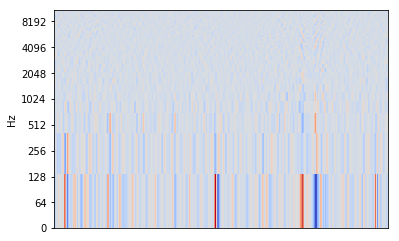

In [0]:
#PLOTTING DELTA MFCC
import librosa.display
librosa.display.specshow(x[8], y_axis='log')

**ONE HOT ENCODING**

In [0]:
y=[]
df.set_index('label',inplace=True)
df
for f in df.index:
  y.append(labels.index(f))
y_train=to_categorical(y,3)
print(y_train)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [0]:
yt=[]
pf.set_index('label',inplace=True)
for f in pf.index:
  yt.append(labels.index(f))
y_test=to_categorical(yt,3)

**MODEL**

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
def get_model():
    model = Sequential()
    model.add(Conv2D(10, kernel_size=(7, 7), activation='relu', input_shape=(40, 938, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(40, kernel_size=(3, 3), activation='relu'))
    model.add(Dropout(0.25))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(3, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adam(),
                  metrics=['accuracy'])
    model.summary()
    return model

**TRAINING**

In [0]:
X_train=X_train.reshape((1000,40,938,1))
print(X_train.shape)
model = get_model()
history=model.fit(X_train, y_train, batch_size=5, epochs=70, verbose=1,validation_split=0.1)

(1000, 40, 938, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 34, 932, 10)       500       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 17, 466, 10)       0         
_________________________________________________________________
dropout_59 (Dropout)         (None, 17, 466, 10)       0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 15, 464, 20)       1820      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 7, 232, 20)        0         
_________________________________________________________________
dropout_60 (Dropout)         (None, 7, 232, 20)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 5, 230, 40)        72

**TESTING**

In [0]:
X_test=X_test.reshape((210,40,938,1))
from sklearn.metrics import confusion_matrix
loss, accuracy = model.evaluate(X_test, y_test, verbose = 1 )
print('Test accuracy is ', accuracy*100, '%')
pred_labels = model.predict(X_test)
#print(pred_labels)
CM = confusion_matrix(y_test.argmax(axis = 1), pred_labels.argmax(axis = 1))
print(CM)

210/210 [==============================] - 0s 683us/step
Test accuracy is  79.0476189340864 %
[[58 10  2]
 [ 2 63  5]
 [ 3 22 45]]
